<a href="https://colab.research.google.com/github/MK316/LDA/blob/main/gensim_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic models with Gensim

Gensim is a popular library for topic modeling. Here we'll see how it stacks up to scikit-learn.

<p class="reading-options">
  <a class="btn" href="/text-analysis/topic-models-with-gensim">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/text-analysis/notebooks/Topic models with Gensim.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Topic models with Gensim.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

### Prep work: Downloading necessary files
Before we get started, we need to download all of the data we'll be using.
* **recipes.csv:** recipes - a list of recipes (but only with ingredient names)
* **state-of-the-union.csv:** State of the Union addresses - each presidential address from 1970 to 2012


In [1]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv -P data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv -P data

--2023-03-05 10:44:19--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6483086 (6.2M) [text/csv]
Saving to: ‘data/recipes.csv’

recipes.csv         100%[===================>]   6.18M  4.35MB/s    in 1.4s    

2023-03-05 10:44:21 (4.35 MB/s) - ‘data/recipes.csv’ saved [6483086/6483086]

--2023-03-05 10:44:21--  https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv
Resolving nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)... 162.243.189.2
Connecting to nyc3.digitaloceanspaces.com (nyc3.digitaloceanspaces.com)|162.243.189.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10501219 (10M) [text/csv]
Saving to: ‘data/state-of-the-union

## Gensim vs. Scikit-learn

[Gensim](https://radimrehurek.com/gensim/) is a very very popular piece of software to do topic modeling with (as is [Mallet](http://mallet.cs.umass.edu/topics.php), if you're making a list). Since we're using scikit-learn for everything else, though, we use scikit-learn instead of Gensim when we get to topic modeling.

Since someone might show up one day offering us tens of thousands of dollars to demonstrate proficiency in Gensim, though, we might as well see how it works as compared to scikit-learn.

## Our data

We'll be using the same dataset as we did [with scikit-learn](/text-analysis/introduction-to-topic-modeling/#Attempt-two:-State-of-the-Union-addresses): State of the Union addresses from 1790 to 2012, where America's president addresses the Congress about the coming year.

In [ ]:
import pandas as pd

df = pd.read_csv("data/state-of-the-union.csv")

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")

df.head()

In [4]:
df.content[0]

'George Washington January          Fellow Citizens of the Senate and House of Representatives   I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs  The recent accession of the important state of North Carolina to the Constitution of the United States  of which official information has been received   the rising credit and respectability of our country  the general and increasing good will toward the government of the Union  and the concord  peace  and plenty with which we are blessed are circumstances auspicious in an eminent degree to our national prosperity   In resuming your consultations for the general good you can not but derive encouragement from the reflection that the measures of the last session have been as satisfactory to your constituents as the novelty and difficulty of the work allowed you to hope  Still further to realize their expectations and to secure the blessing

## Using Gensim

In [ ]:
#!pip install --upgrade gensim

In [5]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [6]:
texts

0      [george, washington, january, fellow, citizens...
1      [state, of, the, union, address, george, washi...
2      [state, of, the, union, address, george, washi...
3      [state, of, the, union, address, george, washi...
4      [state, of, the, union, address, george, washi...
                             ...                        
221    [state, of, the, union, address, george, bush,...
222    [address, to, joint, session, of, congress, ba...
223    [state, of, the, union, address, barack, obama...
224    [state, of, the, union, address, barack, obama...
225    [state, of, the, union, address, barack, obama...
Name: content, Length: 226, dtype: object

In [7]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
#bow = bag of words
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
# dtm?
corpus

In [10]:
# TF-IDF (commonly found words across documents to lower)
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [11]:
# LSI or LDA
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [12]:
lsi_model.print_topics()

[(0,
  '0.084*"tonight" + 0.073*"program" + 0.066*"ve" + 0.065*"help" + 0.065*"budget" + 0.065*"mexico" + 0.065*"americans" + 0.061*"programs" + 0.059*"jobs" + 0.058*"re"'),
 (1,
  '-0.206*"tonight" + -0.169*"ve" + -0.137*"re" + -0.136*"jobs" + -0.130*"americans" + -0.124*"budget" + -0.123*"help" + -0.116*"programs" + -0.112*"program" + -0.106*"billion"'),
 (2,
  '-0.199*"tonight" + -0.177*"ve" + -0.164*"re" + 0.137*"program" + -0.094*"jobs" + -0.092*"ll" + 0.092*"farm" + -0.091*"iraq" + 0.087*"veterans" + 0.081*"interstate"'),
 (3,
  '0.141*"program" + -0.120*"silver" + -0.113*"re" + -0.110*"cent" + -0.105*"ve" + 0.105*"communist" + -0.099*"tonight" + 0.098*"soviet" + 0.095*"programs" + -0.090*"gold"'),
 (4,
  '-0.198*"iraq" + -0.171*"terrorists" + 0.142*"silver" + 0.132*"gold" + -0.125*"interstate" + -0.118*"iraqi" + 0.111*"programs" + -0.110*"al" + 0.101*"notes" + 0.099*"mexico"'),
 (5,
  '0.272*"iraq" + 0.238*"terrorists" + -0.187*"re" + -0.184*"ve" + 0.169*"iraqi" + 0.152*"al" + 0

Gensim is all about how important each word is to the category. Why not visualize it? First we'll make a dataframe that shows each topic, its top five words, and its values.

In [13]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,0.083992,tonight,0
1,0.073470,program,0
2,0.065715,ve,0
3,0.065220,help,0
4,0.065029,budget,0


Then we'll use seaborn to visualize it.

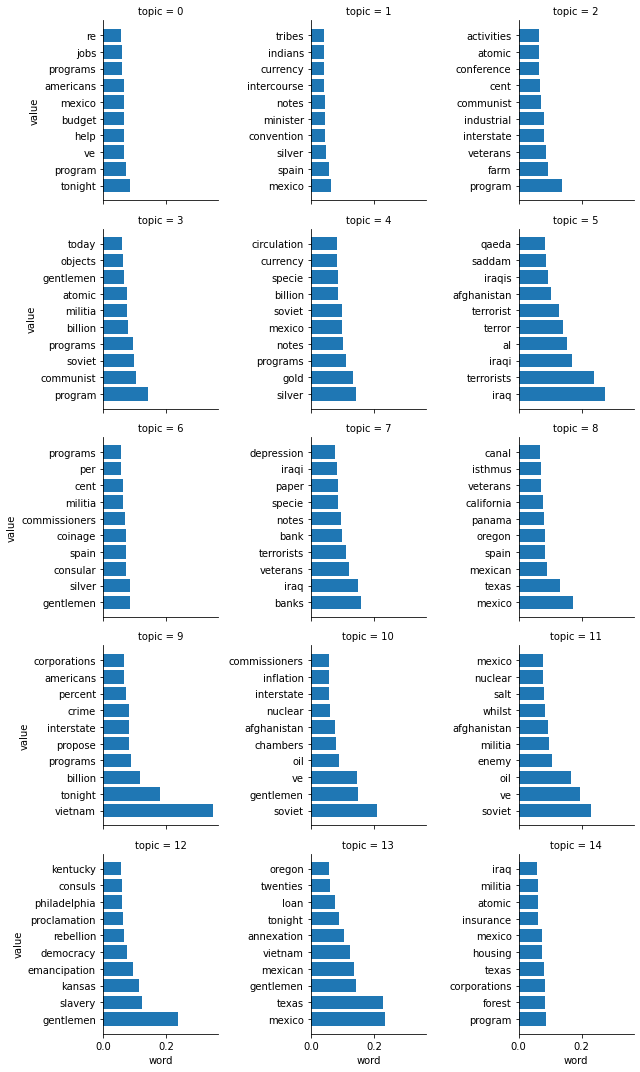

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

## [2] Using LDA with Gensim

Now we'll use LDA.

In [16]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [17]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [18]:
from gensim import models

n_topics = 15

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [24]:
lda_model.print_topics()

[(0,
  '0.005*"1930" + 0.004*"1260" + 0.004*"1986" + 0.004*"1999" + 0.003*"1971" + 0.003*"1997" + 0.003*"1626" + 0.003*"1242" + 0.002*"1559" + 0.002*"1964"'),
 (1,
  '0.003*"1327" + 0.003*"440" + 0.002*"19" + 0.002*"57" + 0.002*"1986" + 0.002*"151" + 0.002*"1242" + 0.002*"578" + 0.002*"1559" + 0.002*"1971"'),
 (2,
  '0.003*"1559" + 0.003*"976" + 0.002*"1327" + 0.002*"951" + 0.002*"1792" + 0.002*"62" + 0.002*"1626" + 0.002*"1930" + 0.002*"1329" + 0.002*"1784"'),
 (3,
  '0.005*"1559" + 0.004*"1930" + 0.003*"1986" + 0.003*"1260" + 0.003*"1989" + 0.003*"1242" + 0.003*"1922" + 0.002*"151" + 0.002*"976" + 0.002*"973"'),
 (4,
  '0.004*"1260" + 0.004*"1986" + 0.003*"1930" + 0.003*"1242" + 0.003*"1971" + 0.003*"1995" + 0.003*"1964" + 0.003*"1545" + 0.003*"1644" + 0.002*"1559"'),
 (5,
  '0.004*"1559" + 0.003*"1626" + 0.003*"1930" + 0.002*"1986" + 0.002*"1260" + 0.002*"1971" + 0.002*"1964" + 0.002*"1784" + 0.002*"1536" + 0.002*"151"'),
 (6,
  '0.003*"1986" + 0.003*"1559" + 0.002*"1242" + 0.002*"1

In [ ]:
!pip install pyLDAvis

In [25]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.013787 -0.001656       1        1  24.007348
0     -0.012066 -0.000070       2        1  19.152541
9      0.006212 -0.000424       3        1  10.271707
1      0.006001  0.003184       4        1   9.123853
2      0.005661  0.000929       5        1   9.064150
6      0.001922  0.002404       6        1   4.591007
4     -0.007421 -0.001551       7        1   4.165821
13    -0.006510  0.000836       8        1   3.661549
7      0.004394  0.002813       9        1   3.639238
3     -0.001336 -0.000259      10        1   2.914582
10    -0.003518 -0.000323      11        1   2.590071
14    -0.006758  0.002148      12        1   2.530110
12     0.001958 -0.006640      13        1   1.736161
5     -0.000129  0.000089      14        1   1.282426
8     -0.002197 -0.001479      15        1   1.269435, topic_info=            Term        Freq       Total Category  logprob  loglift
1930        help  732.000000  732.000000  Default  30.0000  30.0000
1559      mexico  883.000000  883.000000  Default  29.0000  29.0000
1260   americans  697.000000  697.000000  Default  28.0000  28.0000
1986     program  694.000000  694.000000  Default  27.0000  27.0000
1971      budget  562.000000  562.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
1017     islands    5.270535  405.039625  Topic15  -6.4443   0.0247
1708     problem    4.940430  324.304245  Topic15  -6.5089   0.1824
981      surplus    5.094007  372.044931  Topic15  -6.4783   0.0756
1446      tariff    5.287423  448.061003  Topic15  -6.4411  -0.0730
151   convention    5.454789  578.772736  Topic15  -6.4099  -0.2978

[1027 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
883       1  0.194949  accept
883       2  0.173288  accept
883       3  0.129966  accept
883       4  0.086644  accept
883       5  0.064983  accept
...     ...       ...     ...
1796     11  0.037102   young
1796     12  0.021201   young
1796     13  0.015901   young
1796     14  0.015901   young
1796     15  0.010601   young

[7764 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 1, 10, 2, 3, 7, 5, 14, 8, 4, 11, 15, 13, 6, 9])